<a href="https://colab.research.google.com/github/crodier1/Age_Calculator/blob/master/X_Ray_Classificaiton_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import numpy

In [ ]:
BATCH_SIZE = 32

training_data_generator = ImageDataGenerator(
        rescale=1./255
#         ,zoom_range=0.2,
#         rotation_range=15,
#         width_shift_range=0.05,
#         height_shift_range=0.05
)

training_iterator = training_data_generator.flow_from_directory('Covid19-dataset/train',class_mode='categorical',
                                                                color_mode='grayscale',batch_size=BATCH_SIZE)



In [ ]:
validation_data_generator = ImageDataGenerator(rescale=1./255)

validation_iterator = validation_data_generator.flow_from_directory('Covid19-dataset/test',class_mode='categorical',
                                                                    color_mode='grayscale',batch_size=BATCH_SIZE)

Found 66 images belonging to 3 classes.


In [ ]:
from tensorflow.keras import regularizers

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))
model.add(tf.keras.layers.Conv2D(2, 5, strides=3, activation="relu")) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(5, 5), strides=(5,5)))
# model.add(tf.keras.layers.Conv2D(4, 3, strides=1, activation="relu")) 
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(Dense(int(256 * 2/3), activation='relu'))
# model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(3,activation="softmax"))

In [ ]:
model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
   loss=tf.keras.losses.CategoricalCrossentropy(),
   metrics=['accuracy']
)



In [ ]:
steps = training_iterator.samples/BATCH_SIZE


history = model.fit(
       training_iterator,
#        steps_per_epoch=steps,
       epochs=20,
       validation_data=validation_iterator 
#        ,validation_steps=steps
)


Epoch 1/20
8/8 [==============================] - 2s 215ms/step - loss: 1.0697 - accuracy: 0.4422 - val_loss: 1.0133 - val_accuracy: 0.5455
Epoch 2/20
8/8 [==============================] - 1s 172ms/step - loss: 0.8026 - accuracy: 0.7530 - val_loss: 0.7444 - val_accuracy: 0.6818
Epoch 3/20
8/8 [==============================] - 1s 171ms/step - loss: 0.4547 - accuracy: 0.8645 - val_loss: 0.8742 - val_accuracy: 0.6667
Epoch 4/20
8/8 [==============================] - 1s 172ms/step - loss: 0.3313 - accuracy: 0.8327 - val_loss: 0.4544 - val_accuracy: 0.8030
Epoch 5/20
8/8 [==============================] - 2s 189ms/step - loss: 0.2430 - accuracy: 0.8964 - val_loss: 0.4089 - val_accuracy: 0.7576
Epoch 6/20
8/8 [==============================] - 1s 172ms/step - loss: 0.1758 - accuracy: 0.9442 - val_loss: 0.3637 - val_accuracy: 0.7727
Epoch 7/20
8/8 [==============================] - 1s 181ms/step - loss: 0.1334 - accuracy: 0.9482 - val_loss: 0.3014 - val_accuracy: 0.8333
Epoch 8/20
8/8 [====

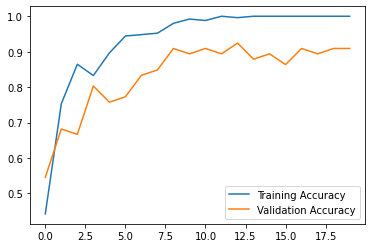

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
